# Gaussian integral

We have to check, using Monte Carlo integration, that:

$$\int_{0}^{\infty} x^3 \exp\bigg(-\frac{x^2}{2\sigma^2}\bigg)dx = 2\sigma^4 $$

Monte Carlo method relies on the fact that if I have an integral of this kind:

$$ \int f(x)p(x) dx $$

where $p(x)$ is a normalized function I can sample, and $f(x)$ is a function that I'm able to evaluate at each point, then:

$$\int f(x) p(x) dx \approx \frac{1}{N}\sum_{i=1}^N f(x_i) $$

where $x_{i}$ are samples drawn from $p$.

So the integral above can be written as: 

$$ \int_{0}^{\infty}{f(x)p(x)} dx = \int_{0}^{\infty} {\frac{\sigma\sqrt{2 \pi}}{2} x^3 \cdot 2\mathrm{Gauss}(\mu = 0; \sigma)} dx$$

where $p(x)$ is a Gaussian function, normalised such that the integral between 0 and $\infty$ gives 1:

$$p(x) = 2 \mathrm{Gauss}(\mu = 0; \sigma) $$

$$f(x) = \frac {\sigma\sqrt{2 \pi}}{2} x^3$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

First of all, let's sample $p(x)$ supposing $\sigma = 4$. In the following cell I first sample from a Gaussian that extends from $-\infty$ to $\infty$, then I just take the absolute values of the extractions to have only positive values. This method is less time spending, since we are not throwing away any extraction.

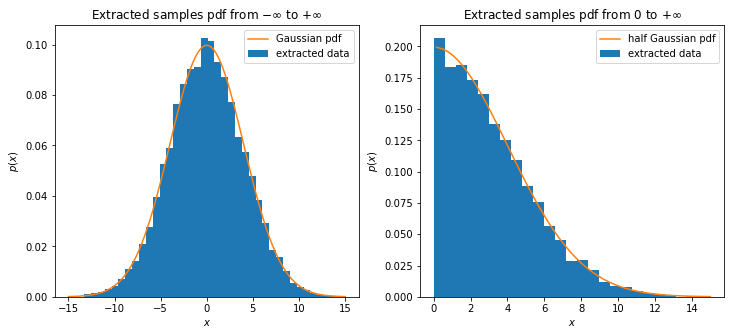

In [2]:
mean_g = 0   #gaussian mean
sigma_g = 4  #gaussian sigma
N = 10000    #number of extractions

distg = norm(loc = mean_g, scale = sigma_g)  #gaussian
x_rand = distg.rvs(N)             #random extraction from the normal distribution

fig, ax = plt.subplots(1,2,figsize=(12,5))
xaxis = np.linspace(-15, 15, 100)
ax[0].hist(x_rand, bins=40, density=True, label='extracted data') 
ax[0].plot(xaxis, distg.pdf(xaxis), label='Gaussian pdf')
ax[0].set_title('Extracted samples pdf from $-\infty$ to $+\infty$')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$p(x)$')
ax[0].legend()

x_rand_pos = np.abs(x_rand)  #to take only the positive values, since the gaussian is symmetric, I take the absolute values of 
                             #the sample. This method is also guaranteeing us that we are not losing any data
    
ax[1].hist(x_rand_pos, density = True, bins = 25, label='extracted data' )
ax[1].plot(xaxis[xaxis>0], 2*distg.pdf(xaxis[xaxis>0]), label='half Gaussian pdf') #multiply by two the given pdf
ax[1].set_title('Extracted samples pdf from $0$ to $+\infty$')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$p(x)$')
ax[1].legend()

Then we just need to compute the integral as stated in the formula above.

In [3]:
#computing the integral with the Monte Carlo method
integral = np.sum(x_rand_pos**3*sigma_g*np.sqrt(np.pi/2))/len(x_rand_pos)
print('The result of the Monte Carlo integral is: %.3f' %integral)

#analytic result
true_res = 2*sigma_g**4
print('The true result is: ', true_res)

The result of the Monte Carlo integral is: 518.321
The true result is:  512


The two results are similar!

Now, since the process relies on a random extraction we could ask: **what happens if I consider different extractions?**
So considering the same number $N (=20000)$ of values extracted from $p(x)$, how are the Monte Carlo integrals distributed?

In [4]:
#repeating the same process as before 20000 times
results=[] #here I store the results of the integral

for i in range(20000):
    x_rand_pos = np.abs(distg.rvs(N))
    results.append(np.sum(x_rand_pos**3*sigma_g*np.sqrt(np.pi/2))/len(x_rand_pos))

The mean of the 50000 integrals is : 512.1
The st. dev. of the 50000 integrals is : 11.3


Text(0.5, 1.0, 'Results of 20000 integrals with the same N samples')

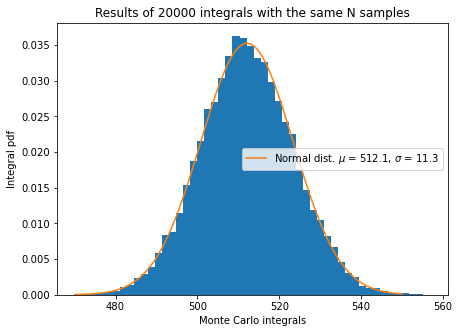

In [5]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

res_mean = np.mean(results)
res_std = np.std(results, ddof=1)
print('The mean of the 50000 integrals is : %.1f' %res_mean)
print('The st. dev. of the 50000 integrals is : %.1f' %res_std)

ax.hist(results, density=True, bins=50)

#overplotting a Gaussian with mean and std derived as sample mean and sample std
ax.plot(np.linspace(470, 550, 1000), norm(loc=res_mean, scale=res_std).pdf(np.linspace(470, 550, 1000)), 
        label='Normal dist. $\mu$ = %.1f, $\sigma$ = %.1f' %(res_mean, res_std))
ax.legend()
ax.set_xlabel('Monte Carlo integrals')
ax.set_ylabel('Integral pdf')
ax.set_title('Results of 20000 integrals with the same N samples')

The data seem to be distributed as a Gaussian function as the one represented in orange, that is found from the sample variance and sample mean. It can be notice how the mean of the distribution of integrals is very close to the expected value $2 \sigma ^4 = 512$.

**What happens if we change the number of samples?**

In the cells below I just change the number $N$ of extractions from the function $p(x)$ to analyse how the value of the integral ($I%ì$) and its error computed as the distance from the expected result are distributed. 

$$ \mathrm{err} = |I - 2\sigma^4|$$

In [6]:
#computing the same Monte Carlo integral with different N

N_tries = np.logspace(1,7,200,dtype = int) #the samples are from 10 to 10^7
integral_arr = [] #this array contains the M.C. integrals as a function of N
err = [] #this array contains the error of the integrals

for i in range(len(N_tries)):
    x_rand = distg.rvs(N_tries[i])
    x_rand_pos = np.abs(x_rand)
    integral_arr.append(np.sum(x_rand_pos**3*sigma_g*np.sqrt(np.pi/2))/len(x_rand_pos))
    err.append(np.abs((integral_arr[i] - 2*sigma_g**4)))#/(2*sigma_g**4)))

Text(0, 0.5, 'Monte Carlo integral')

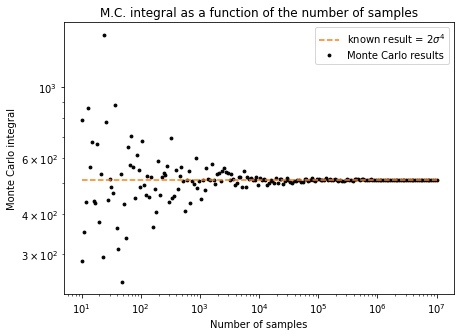

In [7]:
#plotting the integral value as a function of N_tries
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.scatter(N_tries, integral_arr, label='Monte Carlo results', c='black', s=8)
xaxis = np.linspace(np.min(N_tries), np.max(N_tries), 1000)
ax.plot(xaxis, true_res +0*xaxis, label='known result = 2$\sigma^4$', c='tab:orange', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_title('M.C. integral as a function of the number of samples')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Monte Carlo integral')

We can see how as the number of extractions N is getting bigger, so as the function $p(x)$ becomes better sampled, the integral result converges to the known value.

Text(0, 0.5, 'Integral error')

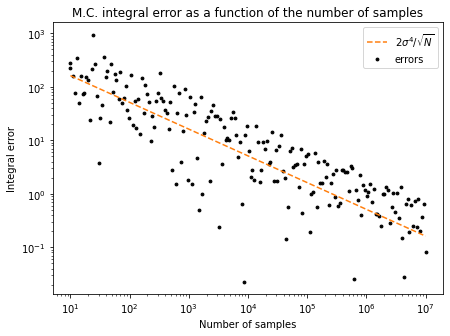

In [8]:
#plotting the error as a function of N_tries
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.scatter(N_tries, err, label='errors', c='black', s=8)
xaxis = np.linspace(np.min(N_tries), np.max(N_tries), 1000)
ax.plot(N_tries,2*sigma_g**4/N_tries**0.5, label='2$\sigma^4$/$\sqrt{N}$', c='tab:orange', ls='--')
#ax.plot(N_tries, np.sqrt(integral_s[0]-(2*sigma_g**4)**2)/N_tries**0.5, label='$\sigma_f$/$\sqrt{N}$', c='tab:green', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_title('M.C. integral error as a function of the number of samples')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Integral error')

We can clearly see that our estimate on the uncertainty of our measurement is decreasing as $\frac{1}{\sqrt{N}}$. But what really happens to the $\sigma$ of the Gaussian distribution of the integrals? 

To understand it better I have digged into some mathematics and I found that, if we define $\bar{f}$ as the expectation value of $f(x)$ evaluated on samples extracted from $p(x)$:
$$\bar{f} = \int f(x) p(x) dx$$

we have that the dispersion of the f function is:
$$\sigma_f = \sqrt{\int (f(x)-\bar{f})^2p(x) dx}= \bar{f^2}- \bar{f}^2$$

Evaluating this integral with the Monte Carlo method:
$$S_{N} = \frac{1}{N}\sum_{i=1}^{N}f(x_{i})$$

And the mean squared difference between the evaluated integral and the true value is:
$$<(S_{N}-\bar{f})^2> = \frac{\sigma_{f}^2}{N}$$

But this is actually the central limit theorem!

So, first of all I evaluate $\sigma_{f}$ using: $\sigma_{f} = \bar{f^2}- \bar{f}^2$, knowing that $\bar{f} = 2\sigma^4$, and calculating $\bar{f^2}$ using scipy integration.

In [9]:
def f2p(x, sigma_g):
    f2p  = sigma_g**2*2*np.pi/4*x**6*2/(np.sqrt(2*np.pi)*sigma_g)*np.exp(-x**2/(2*sigma_g**2))
    return f2p

integral_s = quad(f2p, 0, np.inf, args=(sigma_g))
print('sigma_f is ', np.sqrt(integral_s[0]-(2*sigma_g**4)**2))
print('sigma_f/f_mean is ', (np.sqrt(integral_s[0]-(2*sigma_g**4)**2))/(2*sigma_g**4))

sigma_f is  1132.259520203939
sigma_f/f_mean is  2.2114443753983184


Then I evaluated M(=500) times the same integral with the same number of extractions N, that ranges between 10 and 10$^{5}$. For each of the N I expect a Gaussian distribution for the integral values, as shown before. By evaluating the standard deviation of all the M sample I have $<(S_{N}-\bar{f})^2>$, an I can check that it really decreases as stated above. 

In [10]:
N_tries_1 = np.logspace(1,5,50,dtype = int) #the samples are from 10 to 10^7
err_mean = [] #this array contains the error of the integrals
int_mean = []
int_sq_mean = []

for i in range(len(N_tries_1)):
    integral_arr=[]
    integral_sq_arr=[]
    err = []
    for j in range(500):
        x_rand = distg.rvs(N_tries_1[i])
        x_rand_pos = np.abs(x_rand)
        integral_arr.append(np.sum(x_rand_pos**3*sigma_g*np.sqrt(np.pi/2))/N_tries_1[i])
    int_mean.append(np.mean(integral_arr))
    err_mean.append(np.std(integral_arr, ddof=1))

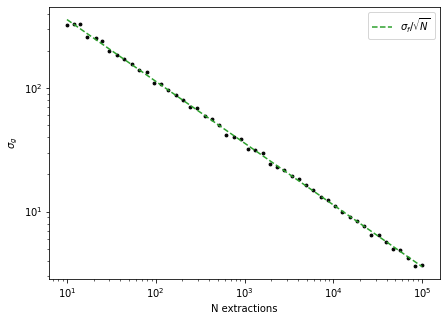

In [12]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.scatter(N_tries_1, err_mean, c='black', s=8)
ax.plot(N_tries_1, np.sqrt(integral_s[0]-(2*sigma_g**4)**2)/(N_tries_1)**0.5, label='$\sigma_f$/$\sqrt{N}$', c='tab:green', ls='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N extractions')
ax.set_ylabel('$\sigma_{g}$')
ax.legend()